In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
#import sagemaker
#import boto3
import matplotlib.pyplot as plt 
pd.set_option('display.max_columns',None) # To display all columns
pd.set_option('display.max_rows',None) # To display all columns
#client = boto3.client('s3')
import feather
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from functools import reduce

In [2]:
df=pd.read_feather('C:/Users/PC1/Desktop/FINAL DATASET/Dataset.ftr')
questions_df = pd.read_feather('C:/Users/PC1/Desktop/FINAL DATASET/dfq.ftr')

In [3]:
dfm =pd.read_feather('C:/Users/PC1/Desktop/FINAL DATASET/EDNET.ftr')

In [4]:
df.head()

,timestamp,solving_id,question_id,user_answer,elapsed_time,user_iD
0,1565096190868,1,5012,b,38000,1
1,1565096221062,2,4706,c,24000,1
2,1565096293432,3,4366,b,68000,1
3,1565096339668,4,4829,a,42000,1
4,1565096401774,5,6528,b,59000,1


In [5]:
df.dtypes

timestamp        int64
solving_id       int64
question_id      int32
user_answer     object
elapsed_time     int64
user_iD          int32
dtype: object

In [6]:
questions_df.head()

,question_id,correct_answer,bundle_id,explanation_id,part,tags,deployed_at
0,1,b,1,1,1,1;2;179;181,2019-05-17 11:40:17.098
1,2,a,2,2,1,15;2;182,2019-05-17 11:40:19.720
2,3,b,3,3,1,14;2;179;183,2019-05-17 11:40:22.784
3,4,b,4,4,1,9;2;179;184,2019-05-17 11:40:25.357
4,5,c,5,5,1,8;2;179;181,2019-05-17 11:40:28.439


In [7]:
questions_df.dtypes

question_id                int32
correct_answer            object
bundle_id                  int32
explanation_id             int32
part                       int32
tags                      object
deployed_at       datetime64[ns]
dtype: object

In [8]:
dfm.head()

,timestamp,solving_id,question_id,user_answer,elapsed_time,user_iD,correct_answer,bundle_id,explanation_id,part,tags,deployed_at,correct
0,1565096190868,1,5012,b,38000,1,c,3544,3544,5,74,2019-09-17 02:43:28.616,0.0
1,1565096221062,2,4706,c,24000,1,c,3238,3238,5,71,2019-10-30 05:34:30.723,1.0
2,1565096293432,3,4366,b,68000,1,b,2898,2898,5,103,2019-10-30 05:37:51.451,1.0
3,1565096339668,4,4829,a,42000,1,c,3361,3361,5,83,2019-06-24 09:24:51.347,0.0
4,1565096401774,5,6528,b,59000,1,d,5060,5060,5,90,2019-10-17 03:03:15.009,0.0


In [9]:
dfm.dtypes

timestamp                  int64
solving_id                 int64
question_id                int32
user_answer               object
elapsed_time               int64
user_iD                    int32
correct_answer            object
bundle_id                  int32
explanation_id             int32
part                       int32
tags                      object
deployed_at       datetime64[ns]
correct                  float64
dtype: object

In [10]:
Perform =pd.read_feather('C:/Users/PC1/Desktop/FINAL DATASET/All_users_perform.ftr')

In [22]:
Perform.head()

,user_iD,Total Questions Attempted,Corrected,Incorrected,Percentage,elapsed_time
0,1,1082,753,329,69.593346,36.75
1,10,16,9,7,56.250000,27.75
2,100,33,18,15,54.545455,34.50
3,1000,1488,930,558,62.500000,34.00
4,10000,405,258,147,63.703704,25.00


<AxesSubplot:>

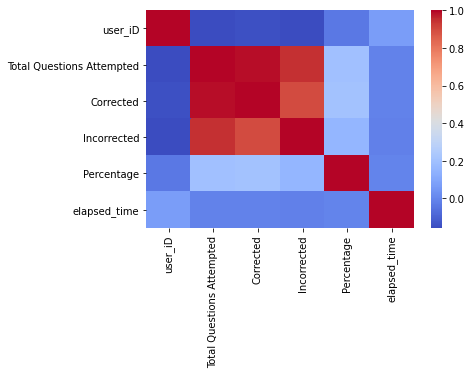

In [40]:
corr = Perform.corr()
#cmap = sns.diverging_palette(250, 10, as_cmap=True)
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,cmap=plt.get_cmap("coolwarm"))

In [34]:
corr

,user_iD,Total Questions Attempted,Corrected,Incorrected,Percentage,elapsed_time
user_iD,1.000000,-0.152238,-0.146032,-0.155422,-0.036550,0.073789
Total Questions Attempted,-0.152238,1.000000,0.990473,0.950281,0.196830,-0.009837
Corrected,-0.146032,0.990473,1.000000,0.898347,0.208262,-0.008592
Incorrected,-0.155422,0.950281,0.898347,1.000000,0.156950,-0.011951
Percentage,-0.036550,0.196830,0.208262,0.156950,1.000000,-0.002016
elapsed_time,0.073789,-0.009837,-0.008592,-0.011951,-0.002016,1.000000


In [11]:
Perform['Corrected'].describe()

count    724139.000000
mean         85.893642
std         399.790470
min           1.000000
25%           3.000000
50%           7.000000
75%          23.000000
max       34233.000000
Name: Corrected, dtype: float64

In [12]:
df_95 = Perform.loc[Perform['Percentage'] >=95] 
#df_95.plot(x="user_iD",y=['Percentage'], kind="bar" , figsize=(15,10) , rot=0).grid()

In [13]:
df_95['user_iD'].nunique()

189

In [14]:
df_90 = Perform.loc[Perform['Percentage'] >=90] 
#df_90.plot(x="user_iD",y=['Percentage'], kind="bar" , figsize=(15,10) , rot=0).grid()

In [15]:
df_90['user_iD'].nunique()

2296

In [16]:
Top_User = Perform.loc[Perform['Corrected'] == 34233 ]

In [17]:
Top_User

,user_iD,Total Questions Attempted,Corrected,Incorrected,Percentage,elapsed_time
53802,15225,36725,34233,2492,93.214432,9.0


In [18]:
Low_User = Perform.loc[Perform['Corrected'] == 1]

In [19]:
Low_User['user_iD'].nunique()

58885

In [21]:
Low_User.head()

,user_iD,Total Questions Attempted,Corrected,Incorrected,Percentage,elapsed_time
30,100024,4,1,3,25.000000,19.5
37,100030,4,1,3,25.000000,22.0
43,100036,4,1,3,25.000000,19.5
65,100059,7,1,6,14.285714,24.0
74,100068,4,1,3,25.000000,22.5


In [43]:
Low_User = Perform.loc[Perform['Total Questions Attempted'] == 5]

In [45]:
Low_User.head()

,user_iD,Total Questions Attempted,Corrected,Incorrected,Percentage,elapsed_time
392,10037,5,3,2,60.0,24.0
486,10046,5,4,1,80.0,38.0
1473,10141,5,1,4,20.0,28.0
2210,10211,5,2,3,40.0,21.0
2242,10214,5,1,4,20.0,14.0


In [47]:
Low_User['user_iD'].nunique()

56302

In [41]:
Low_User['Percentage'].describe()

count    58885.000000
mean        25.681721
std         12.593630
min          3.125000
25%         16.666667
50%         20.000000
75%         33.333333
max         50.000000
Name: Percentage, dtype: float64

In [42]:
Low_User['Total Questions Attempted'].describe()

count    58885.000000
mean         4.843475
std          2.272957
min          2.000000
25%          3.000000
50%          5.000000
75%          6.000000
max         32.000000
Name: Total Questions Attempted, dtype: float64

In [23]:
Perform['elapsed_time'].describe()

count    724139.000000
mean         22.480867
std           9.418123
min           0.000000
25%          18.000000
50%          21.000000
75%          26.000000
max        1181.500000
Name: elapsed_time, dtype: float64

In [24]:
WHAT = Perform.loc[Perform['elapsed_time'] == 0]

In [25]:
WHAT.head()

,user_iD,Total Questions Attempted,Corrected,Incorrected,Percentage,elapsed_time
3917,103726,6,4,2,66.666667,0.0
4267,104056,7,4,3,57.142857,0.0
6715,106384,10,5,5,50.000000,0.0
8840,108402,9,4,5,44.444444,0.0
9995,10950,5,2,3,40.000000,0.0


In [26]:
WHAT['user_iD'].nunique()

1358